In [1]:
! pwd

/home/nbuser/library


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('/home/nbuser/library/StudentsPerformance.csv')
df.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B        

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
missing_data=df.isnull()

In [6]:
missing_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
numeric_features=['math score','reading score','writing score']

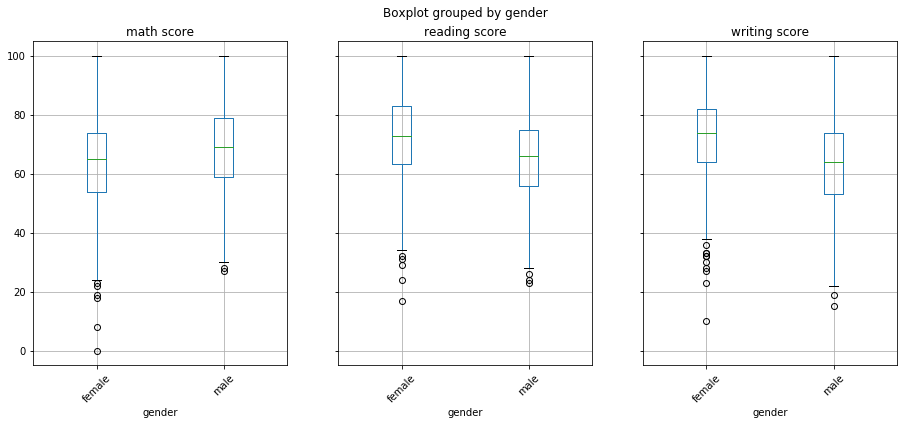

In [11]:
df.boxplot(column=numeric_features , by='gender' ,rot=45, figsize=(15,6) ,layout=(1,3));

Text(0, 0.5, 'writing score')

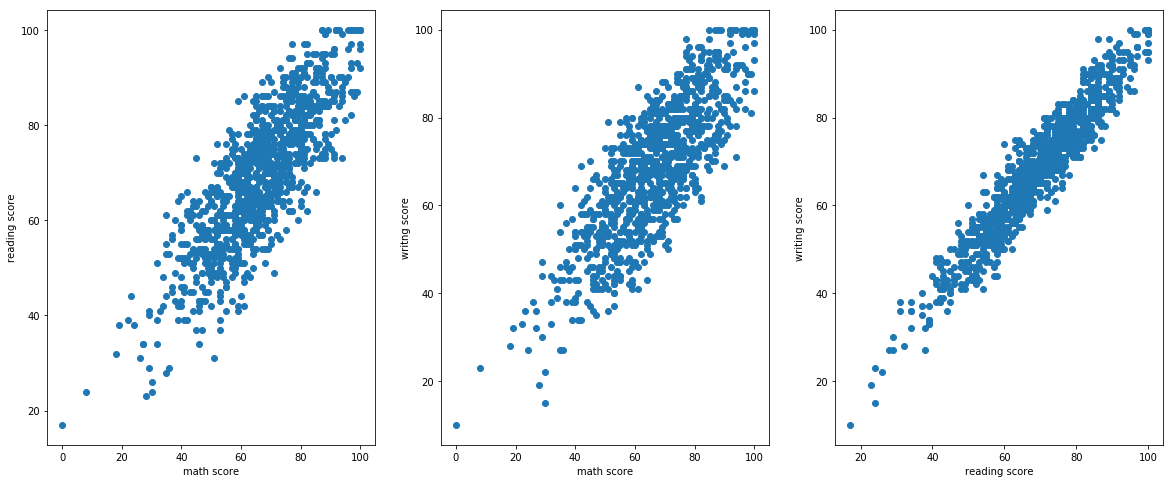

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.scatter(df['math score'] , df['reading score'])
plt.xlabel('math score')
plt.ylabel('reading score')

plt.subplot(1,3,2)
plt.scatter(df['math score'] , df['writing score'])
plt.xlabel('math score')
plt.ylabel('writng score')

plt.subplot(1,3,3)
plt.scatter(df['reading score'] , df['writing score'])
plt.xlabel('reading score')
plt.ylabel('writing score')

In [13]:
df_test=df[['reading score' ,'writing score' ,'math score']]
df_grp=df_test.groupby(['reading score','writing score']  ,as_index=False).mean()
df_grp

,reading score,writing score,math score
0,17,10,0.000000
1,23,19,28.000000
2,24,15,30.000000
3,24,23,8.000000
4,26,22,30.000000
5,28,27,35.000000
6,29,27,36.000000
7,29,30,29.000000
8,31,36,51.000000
9,31,38,26.000000


In [14]:
df_pivot=df_grp.pivot

In [15]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Covariance Plot')

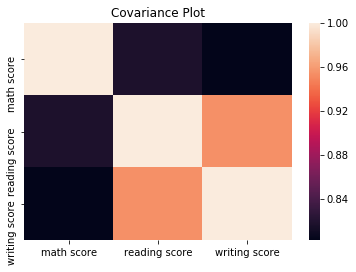

In [16]:
sns.heatmap(df.corr())
plt.title('Covariance Plot')

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
x=df[['reading score']]
y=df[['writing score']]

In [62]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
yhat=lm.predict(x)
yhat[0:5]

array([[70.86668658],
       [88.75024664],
       [93.71790221],
       [55.96371987],
       [76.82787327]])

In [22]:
lm.intercept_

array([-0.66755364])

In [23]:
lm.coef_

array([[0.99353111]])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 108.15195549404636)

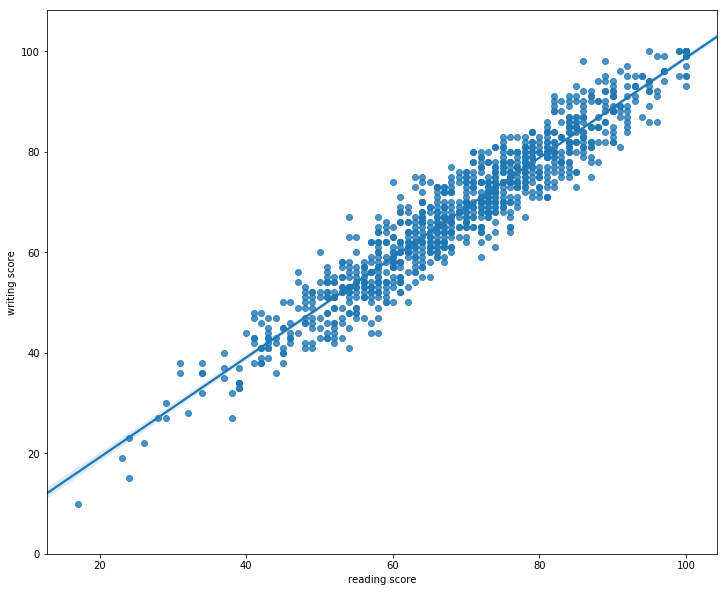

In [24]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='reading score' ,y='writing score' ,data=df)
plt.ylim(0,)

(0, 105.04413227924945)

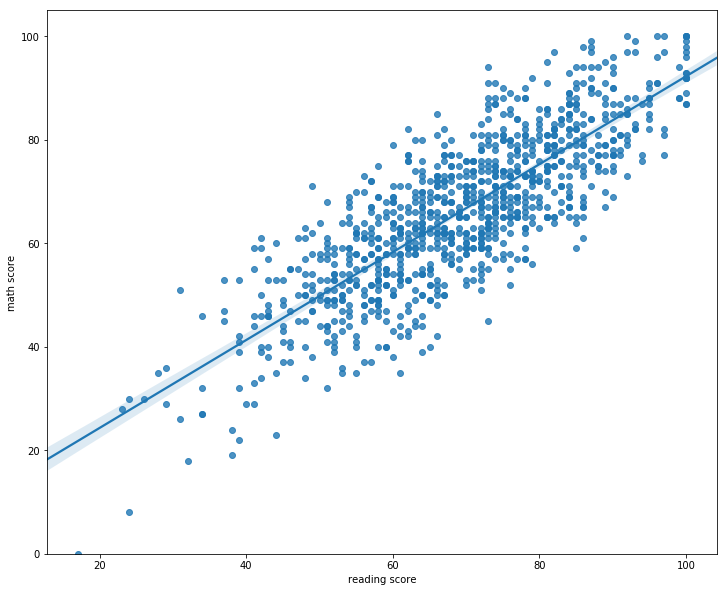

In [25]:
plt.figure(figsize=(width,height))
sns.regplot(x='reading score' , y='math score' , data=df)
plt.ylim(0,)

In [26]:
df['total score'] =df['reading score'] + df['writing score'] +df['math score']
df.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B        

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [70]:
z=df[['reading score' ,'writing score' , 'math score' ,'total score']]

In [29]:
lm.fit(z,df['total score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lm.intercept_

-1.7053025658242404e-13

In [31]:
lm.coef_

array([-5.07303609e-04, -5.07303609e-04, -5.07303609e-04,  1.00050730e+00])

In [34]:
y_hat=lm.predict(z)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'Yhat' is not defined

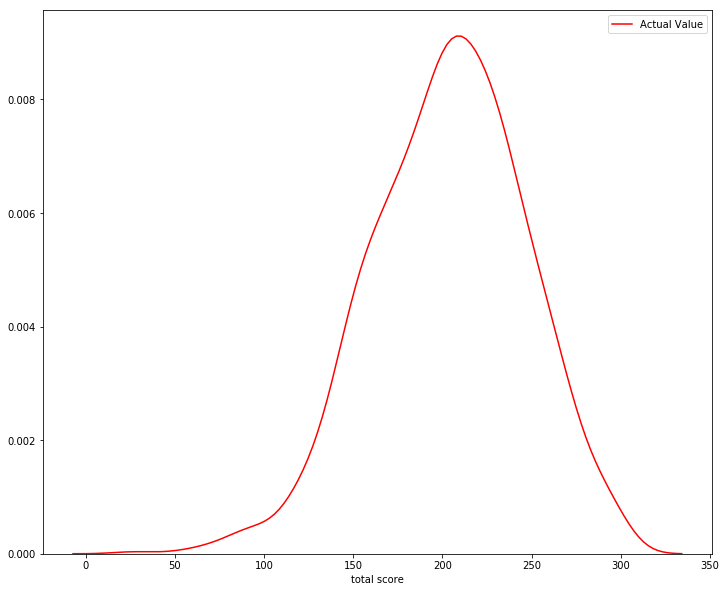

In [40]:
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['total score'],hist=False,color='r',label="Actual Value")
sns.distplot(Yhat,hist=False,color='b',label='Fitted Value',ax=ax1)
plt.title('Actual vs Fitted values ')
plt.xlabel('total score')
plt.ylabel('propertion of marks')
plt.show()
plt.close()


In [41]:
def PlotPolly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial Fit with matplotlib for reading score ~ marks')
    ax=plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('reading score')
    plt.show()
    plt.close()


In [42]:
x= df['writing score']
y=df['reading score']

In [44]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

          3            2
6.54e-06 x - 0.001239 x + 0.991 x + 5.393


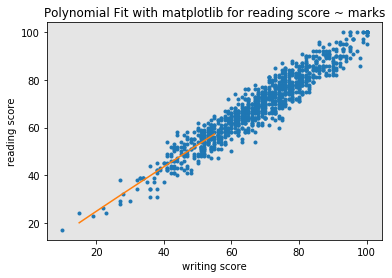

In [45]:
PlotPolly(p,x,y ,'writing score')

In [46]:
np.polyfit(x,y,3)

array([ 6.53981194e-06, -1.23925773e-03,  9.90953594e-01,  5.39334228e+00])

            11             10             9             8             7
-1.479e-16 x  + 9.434e-14 x  - 2.646e-11 x + 4.291e-09 x - 4.449e-07 x
             6            5           4          3        2
 + 3.08e-05 x - 0.001443 x + 0.04531 x - 0.9259 x + 11.6 x - 78.74 x + 234.9


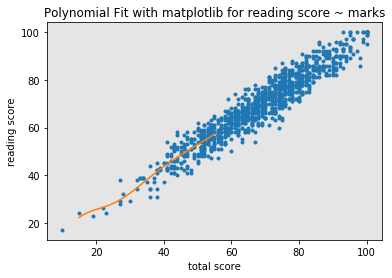

In [47]:
import numpy as np
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'total score')



In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [50]:
z_pr=pr.fit_transform(z)

In [51]:
z.shape

(1000, 4)

In [52]:
z_pr.shape

(1000, 15)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [54]:
Input=[('Scale',StandardScaler()),('Polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]



In [55]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [56]:
pipe.fit(z,y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [58]:
ypipe=pipe.predict(z)
ypipe[0:5]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([72., 90., 95., 57., 78.])

In [64]:
lm.fit(x,y)
print('The R-square is: ',lm.score(x,y))

The R-square is:  0.9112574888913137


In [65]:
Yhat=lm.predict(x)
print("The output of first four predicted value is: ",Yhat[0:4])

The output of first four predicted value is:  [[70.86668658]
 [88.75024664]
 [93.71790221]
 [55.96371987]]


In [66]:
from sklearn.metrics import mean_squared_error

In [68]:
mse=mean_squared_error(df['reading score'],Yhat)
print('The mean square error of price and predicted value is: ',mse)

The mean square error of price and predicted value is:  1.2521363106106382


In [72]:
lm.fit(z,df['reading score'])
print('The R-square is: ',lm.score(z,df['reading score']))

The R-square is:  1.0


In [73]:
y_predict_multifit=lm.predict(z)

In [74]:
from sklearn.metrics import r2_score

In [75]:
r_squared=r2_score(y, p(x))
print('The R-squared value is: ',r_squared)

The R-squared value is:  0.8860390248761219


In [80]:
mean_squared_error(df['reading score'],p(x))

2.5142397630642934

In [77]:
import numpy as np
new_input=np.arange(1,100,1).reshape(-1,1)

In [78]:
lm.fit(x,y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[0.32597747],
       [1.31950859],
       [2.3130397 ],
       [3.30657082],
       [4.30010193]])

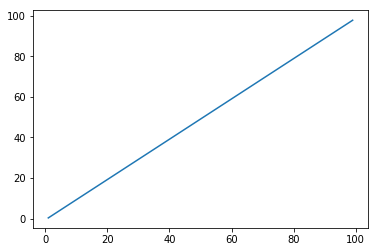

In [81]:
plt.plot(new_input,yhat)
plt.show()